###  Name : Aditya Vishwakarma
 


## The Sparks Foundation ->  GRIP: Data Science & Business Analytics Intern
 
## Task 1 : Simple Linear Regression
### In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

## Goal: Predict the percentage of an student based on the no. of study hours.

In [1]:
#importing libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

In [2]:
#read data

dataset = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [3]:
#how many rows and columns does data consists
dataset.shape

(25, 2)

In [4]:
# head()- shows first 5 rows of data
dataset.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
# renaming the column name
dataset.rename(columns={'Scores': 'percentage_scores'}, inplace = True)

In [6]:
#checking the columns dtype and null value
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Hours              25 non-null     float64
 1   percentage_scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [7]:
#changing datatype of percentage_scores from int to float
dataset['percentage_scores'] = dataset['percentage_scores'].astype('float32')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Hours              25 non-null     float64
 1   percentage_scores  25 non-null     float32
dtypes: float32(1), float64(1)
memory usage: 364.0 bytes


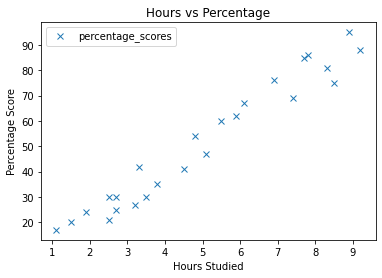

In [8]:
# checking the relationship between no of hours and score percentage
dataset.plot(x='Hours', y='percentage_scores', style='x')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [9]:
#importing the libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [10]:
# splitting both columns from dataset and initializing to new variables
X = dataset.drop('percentage_scores', axis = 1)
y = dataset['percentage_scores']

In [11]:
#if you don't specify the random_state in the code, 
#then every time you run(execute)
#your code a new random value is generated and the train and test datasets would have different values each time.

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=42) 



In [12]:
#finding the shape of X_train, X_test, y_train, y_test
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20, 1), (5, 1), (20,), (5,))

In [13]:
# creating a object of our linear regression model
model = LinearRegression()  
model.fit(X_train, y_train) 

print("Training complete.")

Training complete.


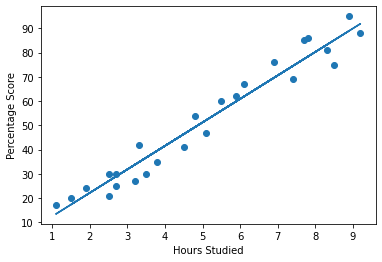

In [14]:
# Plotting the regression line  ( y= mx+c)
line = model.coef_*X+model.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.plot(X, line);
plt.show()

In [15]:
#predicting the percentage_scores for X_test
print(X_test)
y_pred = model.predict(X_test)
y_pred

    Hours
8     8.3
16    2.5
0     2.5
23    6.9
11    5.9


array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

In [16]:
#comparing Actual vs Predicted
predictiondata = pd.DataFrame({'test_hours': X_test['Hours'], 'actual_percent_scores': y_test, 'predicted_percent_scores': y_pred})  
predictiondata

,test_hours,actual_percent_scores,predicted_percent_scores
8,8.3,81.0,83.188141
16,2.5,30.0,27.032088
0,2.5,21.0,27.032088
23,6.9,76.0,69.633232
11,5.9,62.0,59.951153


### What will be predicted score if a student studies for 9.25 hrs/ day?

In [17]:
# Test with our own data
own_hours = pd.DataFrame({'Hours': [9.25]})
unknownpred = model.predict(own_hours)
print("No of Hours = {}".format(own_hours['Hours'][0]))
print("Predicted Score = {}".format(unknownpred[0]))

No of Hours = 9.25
Predicted Score = 92.38611528261495


## Checking performance of our algorithm

In [18]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 3.920751190209927
